## The Exercise

You will build a few neural networks during this exercise, for all the networks you build you should:

* Build a network for classification using the built in MNIST dataset.
* Use the sigmoid activation function.
* Use the categorical cross entropy loss function.
* Use stochastic gradient descent as the optimizer.
* Train for at least 10 epochs.
* Plot a chart with your network's performance on training and validation data during training.

### Part One:

Use Tensorflow to build a network with a single hidden layer and at least 300,000 trainable parameters. 

In [1]:
# Imports and formatting the data
# See previous Notebooks if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Define the number of classes to create 1-hot encoded vectors using to_categorical
num_classes = 10 
# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images.shape[0] is the list length, hence 60,000.
# training_images.shape[1] is the image shape, hence (28, 28).
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

###### Build a network with a single hidden layer and at least 300,000 trainable parameters.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 1.1617 - accuracy: 0.6759 - val_loss: 0.3998 - val_accuracy: 0.9040
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4255 - accuracy: 0.8917 - val_loss: 0.3045 - val_accuracy: 0.9237
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3391 - accuracy: 0.9084 - val_loss: 0.2622 - val_accuracy: 0.9322
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2965 - acc

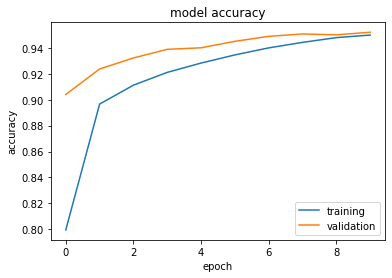

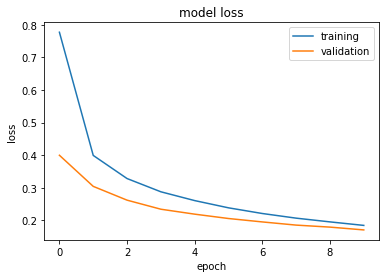

Test loss: 0.199
Test accuracy: 0.943


In [2]:
single_layer_model = Sequential()

# Here I've chosen a hidden layer with 400 nodes to have more than 300,000 parameters. 
single_layer_model.add(Dense(units=400, activation='sigmoid', input_shape=(image_size,)))
single_layer_model.add(Dense(units=num_classes, activation='softmax'))
single_layer_model.summary()

single_layer_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = single_layer_model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history, single_layer_model)

Answer the following questions about this model:

* How many total trainable parameters does this model have? This model has 318010 trainable parameters. 
  * How many weights? The number of weights is equal to the number of inputs to the hidden layer, that is 784 * 400 = 313,600 plus the number of inputs to the output layer, which is 400 * 10 = 4,000. The total is 317,600 
  * How many biases? There are 400 biases in the hidden layer (equal to the number of nodes) and 10 biases in the output layer, accounting to a total of 410. . 
* How accurate was this model on the validation data after 10 epochs? The accuracy on the validation data was 0.9520 after 10 epochs. 
  * How different was the model's performance on the training data? The accuracy on the training data was 0.9518. 
  * How different was the model's performance on the test data? The accuracy on the test data was 0.943. 
* About how long did each epoch take? Each epoch took 2 seconds. 

Use Tensorflow to build a network with a single hidden layer at fewer than 50,000 trainable parameters, then answer the same questions.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                47100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                610       
Total params: 47,710
Trainable params: 47,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 1.6099 - accuracy: 0.5211 - val_loss: 0.7036 - val_accuracy: 0.8678
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.7113 - accuracy: 0.8442 - val_loss: 0.5046 - val_accuracy: 0.8958
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.5397 - accuracy: 0.8776 - val_loss: 0.4063 - val_accuracy: 0.9132
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4584 - acc

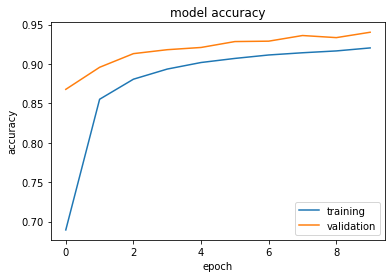

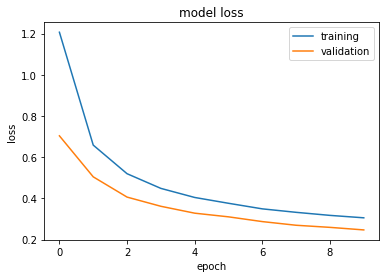

Test loss: 0.295
Test accuracy: 0.923


In [3]:
single_layer_model_two = Sequential()

# Here I've chosen a hidden layer with 400 nodes to have more than 300,000 parameters. 
single_layer_model_two.add(Dense(units=60, activation='sigmoid', input_shape=(image_size,)))
single_layer_model_two.add(Dense(units=num_classes, activation='softmax'))
single_layer_model_two.summary()

single_layer_model_two.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = single_layer_model_two.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)
plot_training_history(history, single_layer_model_two)

Answer the following questions about this model:

* How many total trainable parameters does this model have? This model has 47,710 trainable parameters. 
  * How many weights? The number of weights is equal to the number of inputs to the hidden layer, that is 784 * 60 = 47,040 plus the number of inputs to the output layer, which is 60 * 10 = 600. The total is 47,640 
  * How many biases? There are 60 biases in the hidden layer (equal to the number of nodes) and 10 biases in the output layer, accounting to a total of 70. . 
* How accurate was this model on the validation data after 10 epochs? The accuracy on the validation data was 0.9403 after 10 epochs. 
  * How different was the model's performance on the training data? The accuracy on the training data was 0.9218. 
  * How different was the model's performance on the test data? The accuracy on the test data was 0.923. 
* About how long did each epoch take? Each epoch took 1 second.

### Part Two:

Use Tensorflow to build 3 networks, each with at least 10 hidden layers such that:

* The first model has fewer than 10 nodes per layer.
* The second model has between 10-50 nodes per layer.
* The third model has between 50-100 nodes per layer.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                

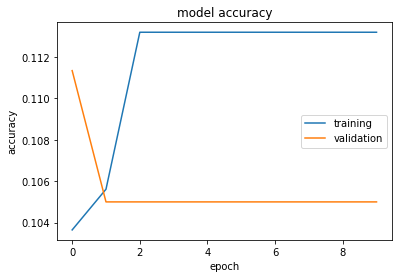

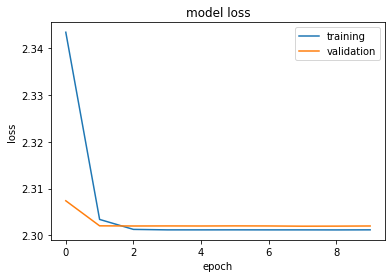

Test loss: 2.3
Test accuracy: 0.113


In [4]:
# Build a model with 11 hidden layers and 8 nodes per layer. 
model = Sequential()
model.add(Dense(units=8, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=8, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 50)               

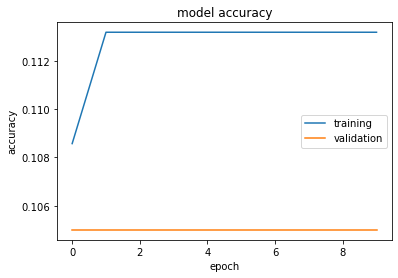

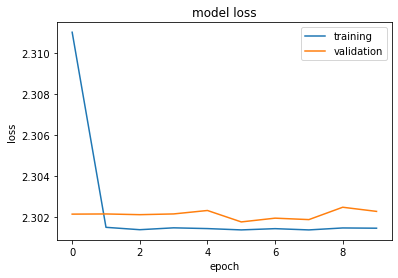

Test loss: 2.3
Test accuracy: 0.113


In [5]:
# Build a model with 11 hidden layers and 8 nodes per layer. 
model = Sequential()
model.add(Dense(units=50, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=50, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_34 (Dense)             (None, 100)              

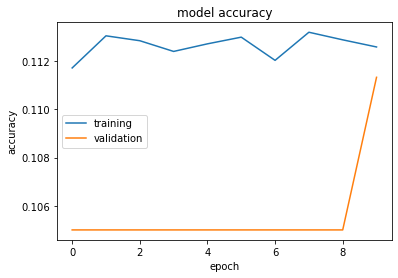

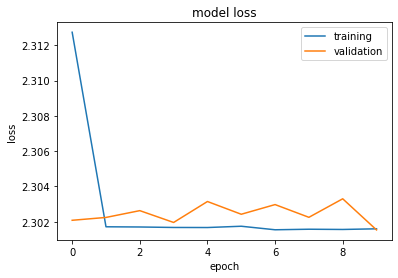

Test loss: 2.3
Test accuracy: 0.103


In [6]:
# Build a model with 11 hidden layers and 8 nodes per layer. 
model = Sequential()
model.add(Dense(units=100, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=100, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

Then, answer these questions:  

* Did any of these models achieve better than 20% accuracy on validation or test data? No. 
  * State a hypothesis about why these networks performed the way they did.
  * *An answer to this question is given in a notebook from the next section [01-activations](/02-training-and-regularization-tactics/01-activations.ipynb)*
* How many total trainable parameters do each of these models have? 7,090; 65,260; 180,510
* Is there a clear correlation between number of trainable parameters and accuracy? Accuracy isn't increasing on test data as the number of parameters grows.
  * Consider your results from part one in answering this question.

### Part Three:

Build a network with at least 3 hidden layers that achieves better than 92% accuracy on validation and test data. You may need to train for more than 10 epochs to achieve this result.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 7ms/step - loss: 2.3157 - accuracy: 0.1611 - val_loss: 2.1768 - val_accuracy: 0.4383
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 2.1380 - accuracy: 0.5100 - va

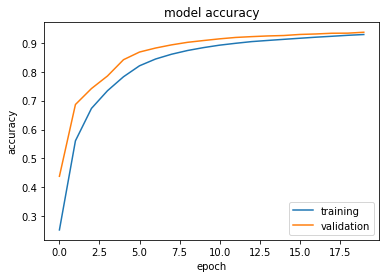

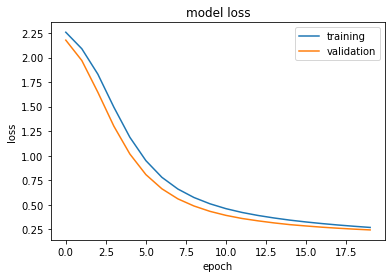

Test loss: 0.281
Test accuracy: 0.924


In [7]:
# Build a model with 3 hidden layers that achieves more than 92% accuracy on validation and test data.
model = Sequential()
model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=True, validation_split=.1)
plot_training_history(history, model)

Compare your best results to the result you got in part one:
  * Which network achieved the best accuracy on test data after training? The model built in part one achieved the best accuracy. 
  * Did the networks train for a similar number of epochs? No. The model built in part three trained for twice the number of epochs (20 vs 10). 